In [28]:
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'1.16.2'

In [29]:
class Bandit:
    def __init__(self, m):
        self.m = m           # bandit mean reward
        self.N = 0           # number of plays
        self.mean = 0        # calculated mean 
        return None
    def pull(self):
        return np.random.randn()+self.m
    def update(self, x):
        self.N +=1
        self.mean = (1-1.0/self.N)*self.mean+(1.0/self.N)*x

In [30]:
def run_experiment_eps(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    for i in range(N):
        p = np.random.rand()
        if p<eps:
            selection = np.random.choice(3)
            #print("EXPLOIT - arm {}".format(selection))
        else:
            selection = np.argmax([b.mean for b in bandits])
            #print("EXPLORE - arm {}".format(selection))
        
        value = bandits[selection].pull()
        bandits[selection].update(value)
        data[i] = value
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
    return cumulative_average

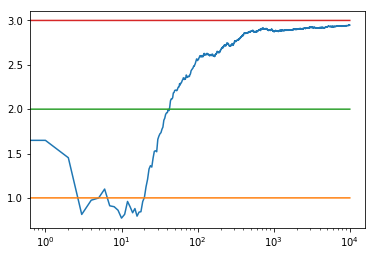

0.959980041701254
2.0676616628103535
2.99864518568262


array([1.38417808, 1.64859506, 1.45267832, ..., 2.94679121, 2.94680576,
       2.94684961])

In [31]:
run_experiment_eps(1.0, 2.0, 3.0, 0.05, 10000)

## Upper Confidence Bound 1 - UCB1

In [40]:
class BanditUCB1:
    def __init__(self, m):
        self.m = m                 # bandit mean reward
        self.N = 0                 # number of plays
        self.mean = 0    # calculated mean 
        return None
    def pull(self):
        return np.random.randn()+self.m
    def update(self, x):
        self.N +=1
        self.mean = (1-1.0/self.N)*self.mean+(1.0/self.N)*x

In [41]:
def ucb(mean, n, nj):
    if nj == 0:
        return float('inf')
    else:
        return mean + np.sqrt(2*np.log(n)/nj)

In [42]:
a = float('inf')

In [45]:
def run_experiment_ucb(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    for i in range(N):
        selection = np.argmax([ucb(b.mean, i+1, b.N) for b in bandits])        
        value = bandits[selection].pull()
        bandits[selection].update(value)
        data[i] = value
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
    return cumulative_average

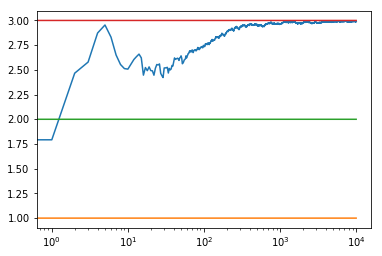

0.9588897209105053
1.1293941840713304
2.9922889049708283


array([1.78613107, 1.7924113 , 2.46637213, ..., 2.99014267, 2.99013294,
       2.99015447])

In [46]:
run_experiment_ucb(1.0, 2.0, 3.0, 10000)

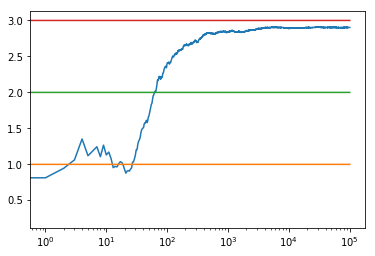

1.014573367412928
2.0190496983480877
3.001109148130375


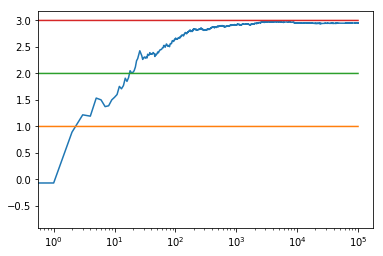

1.02312143120721
1.993350559375764
3.002940086064371


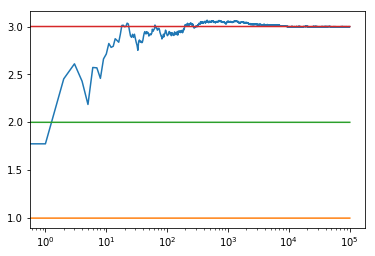

0.8659937469866054
1.8599711883902736
2.9988170047293066


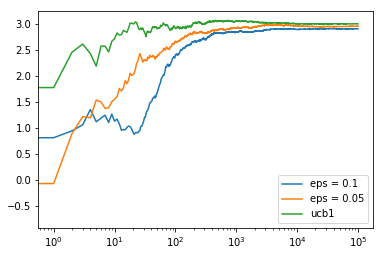

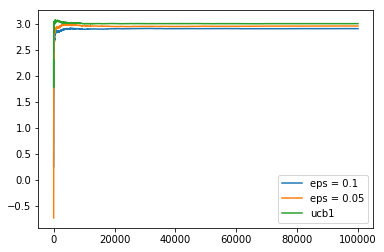

In [48]:
c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
c_05 = run_experiment_eps(1.0, 2.0, 3.0, 0.05, 100000)
ucb1 = run_experiment_ucb(1.0, 2.0, 3.0, 100000)

# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(ucb1, label='ucb1')
plt.legend()
plt.xscale('log')
plt.show()

# linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(ucb1, label='ucb1')
plt.legend()
plt.show()

## Thompson Sampling

In [74]:
from scipy.stats import beta
from scipy.stats import beta
import matplotlib.pyplot as plt

In [96]:
class BanditTS:
    def __init__(self, m):
        self.m = m                 # bandit mean reward
        self.N = 0                 # number of plays
        self.mean = 0              # calculated mean 
        return None
    def pull(self):
        return np.random.randn()+self.m
    def update(self, x):
        self.N +=1
        self.mean = (1-1.0/self.N)*self.mean+(1.0/self.N)*x

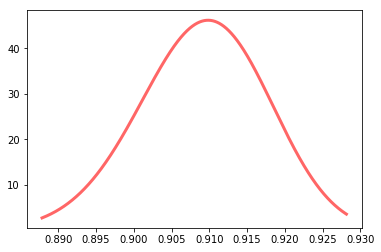

In [97]:
fig, ax = plt.subplots(1, 1)
a, b = 1000, 100
N = 1000000
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), N)
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=3, alpha=0.6, label='beta pdf')